In [ ]:
import time
import os

In [1]:
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns

In [2]:
import cv2  

keypoints: 283, descriptors: (283, 61)
keypoints: 283, descriptors: (283, 61)


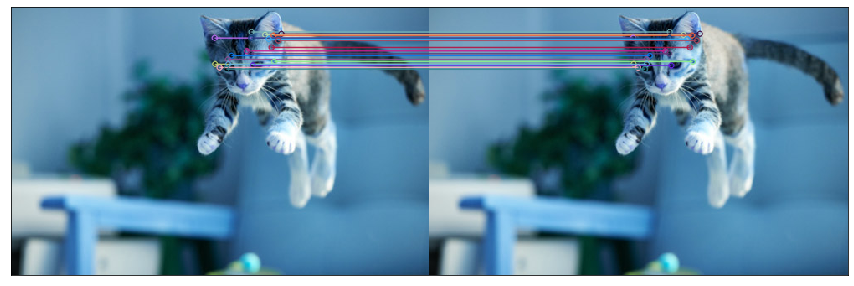

In [5]:
# load the image and convert it to grayscale
im1            = cv2.imread('C:/Images/Cat.png')
im2            = cv2.imread('C:/Images/Cat.png')
gray1          = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
gray2          = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)    


# using [AKAZE] local features to detect and match keypoints on two images
# initialize the AKAZE descriptor, then detect keypoints and extract
# local invariant descriptors from the image
detector       = cv2.AKAZE_create()
(kps1, descs1) = detector.detectAndCompute(gray1, None)
(kps2, descs2) = detector.detectAndCompute(gray2, None)

print("keypoints: {}, descriptors: {}".format(len(kps1), descs1.shape))
print("keypoints: {}, descriptors: {}".format(len(kps2), descs2.shape))    

# Match the features
bf            = cv2.BFMatcher(cv2.NORM_HAMMING) # returns the best match
matches       = bf.knnMatch(descs1,descs2, k=2) # returns k best matches where k is specified by the user # typo fixed

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.9*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
im3 = cv2.drawMatchesKnn(im1, kps1, im2, kps2, good[1:20], None, flags=2)

plt.figure(figsize = (15,7))
plt.imshow(im3)
plt.xticks([]),plt.yticks([])
plt.show()

keypoints: 283, descriptors: (283, 61)
keypoints: 266, descriptors: (266, 61)


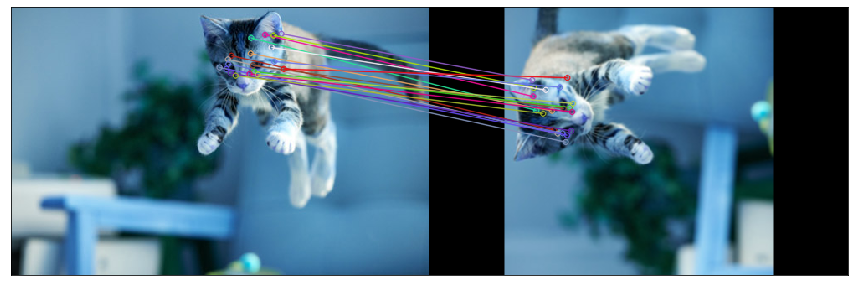

In [7]:
# load the image and convert it to grayscale
im1            = cv2.imread('C:/Images/Cat.png')
im2            = cv2.imread('C:/Images/Cat.png')

rows,cols      = im2.shape[:2] 
#(col/2,rows/2) is the center of rotation for the image 
# M is the cordinates of the center 

M              = cv2.getRotationMatrix2D((cols/2,rows/2),90,1) 
im2            = cv2.warpAffine(im2,M,(cols,rows)) 


gray1          = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)
gray2          = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY)    


# using [AKAZE] local features to detect and match keypoints on two images
# initialize the AKAZE descriptor, then detect keypoints and extract
# local invariant descriptors from the image
detector       = cv2.AKAZE_create()
(kps1, descs1) = detector.detectAndCompute(gray1, None)
(kps2, descs2) = detector.detectAndCompute(gray2, None)

print("keypoints: {}, descriptors: {}".format(len(kps1), descs1.shape))
print("keypoints: {}, descriptors: {}".format(len(kps2), descs2.shape))    

# Match the features
bf            = cv2.BFMatcher(cv2.NORM_HAMMING) # returns the best match
matches       = bf.knnMatch(descs1,descs2, k=2) # returns k best matches where k is specified by the user # typo fixed

# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.9*n.distance:
        good.append([m])

# cv2.drawMatchesKnn expects list of lists as matches.
im3 = cv2.drawMatchesKnn(im1, kps1, im2, kps2, good[1:20], None, flags=2)

plt.figure(figsize = (15,7))
plt.imshow(im3)
plt.xticks([]),plt.yticks([])
plt.show()